In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_probability as tfp


(ds, ), info = tfds.load(name='cats_vs_dogs', with_info=True, as_supervised=False, split=['train'])
seed = tfp.util.SeedStream(0, salt='') 

def mixup(data):
    image, label = data['image'], data['label']
    beta_dist = tfp.distributions.Beta(0.1, 0.1)  # alpha = 0.1
    beta = tf.cast(beta_dist.sample([], seed=32), tf.float32)
    image = (beta * image + (1 - beta) * tf.reverse(image, axis=[0]))
    label = (beta * label + (1 - beta) * tf.reverse(label, axis=[0]))
    return {'image': image, 'label': label}

def resize(data):
    image, label = data['image'], data['label']
    image = tf.image.resize(image, [512, 512], method=tf.image.ResizeMethod.BILINEAR)
    image = tf.cast(image, tf.float32)
    label = tf.one_hot(label, 2)
    return {'image': image, 'label': label}

def cast_int(data):
    image, label = data['image'], data['label']
    image = tf.cast(image, tf.uint8)
    label = tf.math.argmax(label)
    return {'image': image, 'label': label}

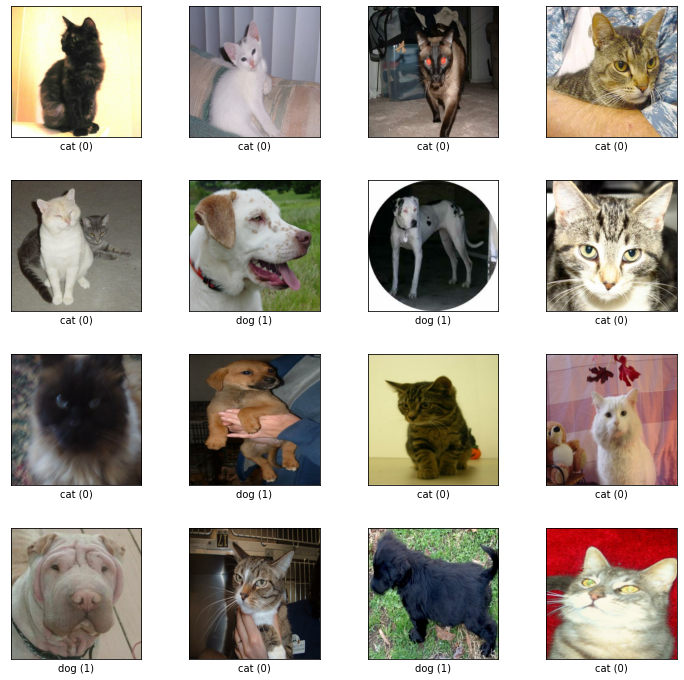

Label:  tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]], shape=(16, 2), dtype=float32)
Revert:  tf.Tensor(
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(16, 2), dtype=float32)


In [4]:
ds_nomixup = ds.map(resize).batch(16)

tfds.visualization.show_examples(ds_nomixup.unbatch().map(cast_int), info, rows=4, cols=4)

for d in ds_nomixup.take(1):
    print('Label: ', d['label'])  # label

for d in ds_nomixup.take(1):
    print('Revert: ', tf.reverse(d['label'], axis=[0]))

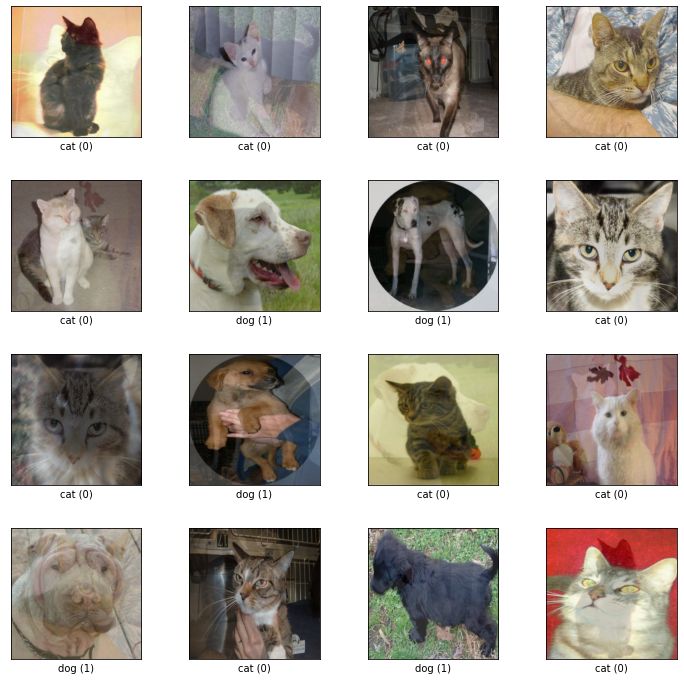

Label:  tf.Tensor(
[[1.         0.        ]
 [0.77483255 0.22516745]
 [1.         0.        ]
 [0.77483255 0.22516745]
 [1.         0.        ]
 [0.22516745 0.77483255]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.77483255 0.22516745]
 [1.         0.        ]
 [0.22516745 0.77483255]
 [1.         0.        ]
 [0.22516745 0.77483255]
 [1.         0.        ]], shape=(16, 2), dtype=float32)


In [5]:
ds_mixup = ds.map(resize).batch(16).map(mixup)

tfds.visualization.show_examples(ds_mixup.unbatch().map(cast_int), info, rows=4, cols=4)

for d in ds_mixup.take(1):
    print('Label: ', d['label'])  # label